# Загузка данных из csv

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df=pd.read_csv('Housing.csv')
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [2]:
print(df.shape)

(545, 13)


# Характеристика данных

In [3]:
display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,545.000,545.000,545.000,545.000,545.000,545.000
mean,4766729.248,5150.541,2.965,1.286,1.806,0.694
std,1870439.616,2170.141,0.738,0.502,0.867,0.862
min,1750000.000,1650.000,1.000,1.000,1.000,0.000
25%,3430000.000,3600.000,2.000,1.000,1.000,0.000
50%,4340000.000,4600.000,3.000,1.000,2.000,0.000
75%,5740000.000,6360.000,3.000,2.000,2.000,1.000
max,13300000.000,16200.000,6.000,4.000,4.000,3.000


In [4]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus'], dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# Поиск NULLов

In [6]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Дополнение пустыми значениями

In [7]:
i = 1
for i in range(3):
    df.loc[len(df)] = [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]

In [8]:
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.000,7420.000,4.000,2.000,3.000,yes,no,no,no,yes,2.000,yes,furnished
1,12250000.000,8960.000,4.000,4.000,4.000,yes,no,no,no,yes,3.000,no,furnished
2,12250000.000,9960.000,3.000,2.000,2.000,yes,no,yes,no,no,2.000,yes,semi-furnished
3,12215000.000,7500.000,4.000,2.000,2.000,yes,no,yes,no,yes,3.000,yes,furnished
4,11410000.000,7420.000,4.000,1.000,2.000,yes,yes,yes,no,yes,2.000,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1750000.000,2910.000,3.000,1.000,1.000,no,no,no,no,no,0.000,no,furnished
544,1750000.000,3850.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,unfurnished
545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Замена пустых значений

In [20]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [21]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000.000,7420.000,4.000,2.000,3.000,yes,no,no,no,yes,2.000,yes,furnished
1,12250000.000,8960.000,4.000,4.000,4.000,yes,no,no,no,yes,3.000,no,furnished
2,12250000.000,9960.000,3.000,2.000,2.000,yes,no,yes,no,no,2.000,yes,semi-furnished
3,12215000.000,7500.000,4.000,2.000,2.000,yes,no,yes,no,yes,3.000,yes,furnished
4,11410000.000,7420.000,4.000,1.000,2.000,yes,yes,yes,no,yes,2.000,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,1750000.000,2910.000,3.000,1.000,1.000,no,no,no,no,no,0.000,no,furnished
544,1750000.000,3850.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,unfurnished
545,4340000.000,4600.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished
546,4340000.000,4600.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished


# Дубликаты

In [31]:
display(df[df.duplicated()])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
546,4340000.000,4600.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished
547,4340000.000,4600.000,3.000,1.000,2.000,yes,no,no,no,no,0.000,no,semi-furnished


# Выбросы

In [37]:
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

outliers = detect_outliers_iqr(df['price'])
print(f"Number of outliers detected: {sum(outliers)}")
outliers = detect_outliers_iqr(df['area'])
print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 15
Number of outliers detected: 12


# Гистограммы

i:0, col:0, row:0
i:1, col:1, row:0


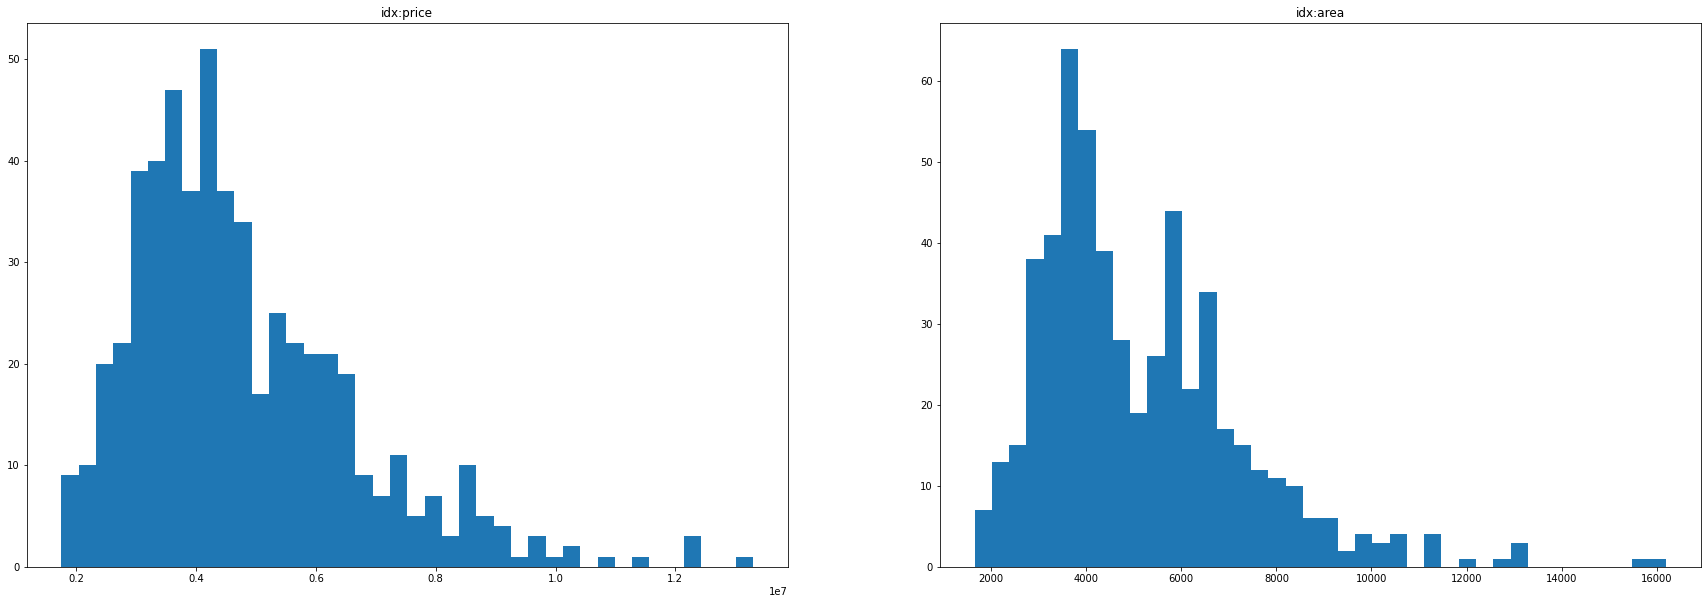

In [12]:
n_row = 1
n_col = 2

columns = list(df.columns[0:2])

fig, ax = plt.subplots(n_row, n_col, figsize=(30, 10))
ax

for idx in range(len(columns)): 
    row = idx % n_row
    col = idx // n_row
    print(f'i:{idx}, col:{col}, row:{row}')

    ax[col].hist(df[columns[idx]],bins=40)
    ax[col].set_title(f"idx:{columns[idx]}")
    
plt.show()

i:0, col:0, row:0
i:1, col:0, row:1
i:2, col:1, row:0
i:3, col:1, row:1
i:4, col:2, row:0
i:5, col:2, row:1
i:6, col:3, row:0
i:7, col:3, row:1
i:8, col:4, row:0
i:9, col:4, row:1


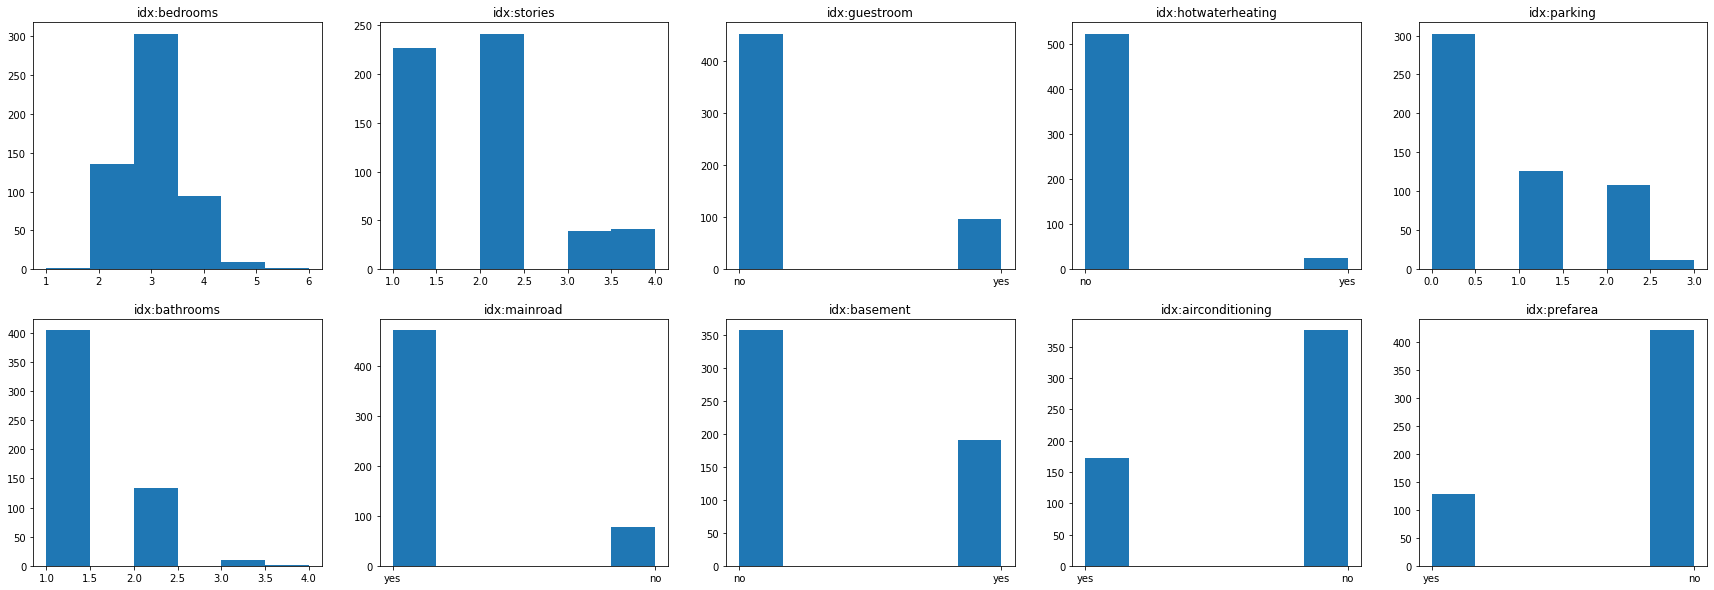

In [22]:
n_row = 2
n_col = 5

columns = list(df.columns[2:12])

fig, ax = plt.subplots(n_row, n_col, figsize=(30, 10))
ax

for idx in range(len(columns)): 
    row = idx % n_row
    col = idx // n_row
    print(f'i:{idx}, col:{col}, row:{row}')

    ax[row,col].hist(df[columns[idx]],bins=6)
    ax[row,col].set_title(f"idx:{columns[idx]}")
    
plt.show()

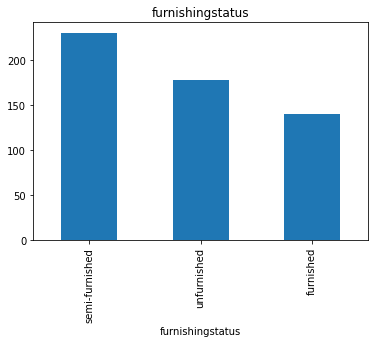

In [23]:
df['furnishingstatus'].value_counts().plot(kind='bar')
plt.title('furnishingstatus')
plt.show()

# Scatterplot

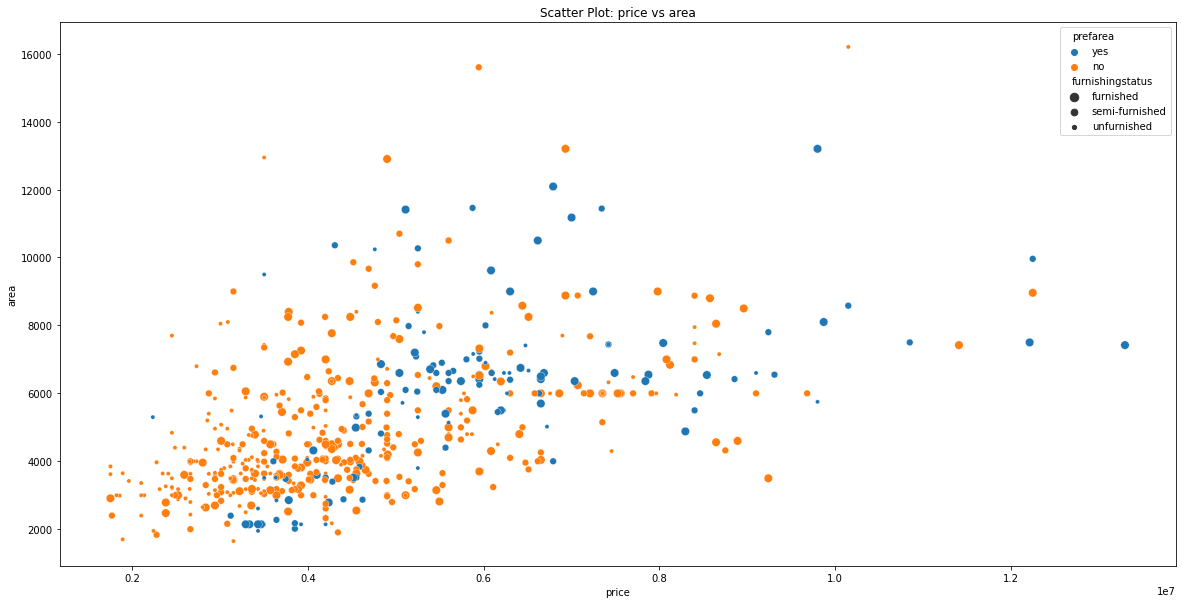

In [24]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='price', y='area', hue= 'prefarea', data=df,size='furnishingstatus')
plt.title('Scatter Plot: price vs area')
plt.show()

# Наиболее часто встречающиеся значения площади

In [25]:
df['area'].mode()

0   6000.000
Name: area, dtype: float64

In [26]:
df.groupby('area', as_index=False).agg(
   cnt=('area', 'count')
).sort_values(['cnt'],ascending=False).head(10)

,area,cnt
183,6000.000,24
39,3000.000,14
126,4500.000,13
100,4000.000,11
166,5500.000,9
206,6600.000,9
130,4600.000,8
71,3600.000,8
75,3640.000,7
73,3630.000,7


Либо были построены какие то однотипные дома (например, коттеджный поселок), либо заполнены пустые значения средними значениями для определенных категорий домов

# Корреляционная матрица

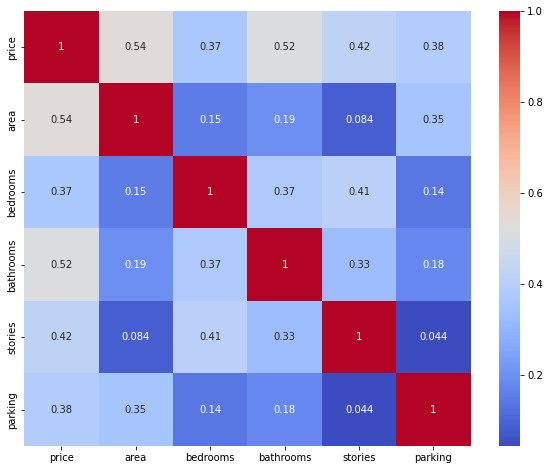

In [28]:
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()